In [4]:
from data_fetcher import DataFetcher
from feature_engineer import FeatureEngineer
from model_trainer import ModelTrainer
from predictor import StockPredictor
from utils import *
from config import STOCKS
import matplotlib.pyplot as plt
from utils import print_performance_summary


In [22]:
print("================ Indian Stock Analysis ================")

================ Indian Stock Analysis ================


In [5]:
fetcher = DataFetcher()
trainer = ModelTrainer()
stock_data = fetcher.get_multiple_stocks(STOCKS)
results = {}

for symbol, df in stock_data.items():
    company = symbol.replace('.NS', '')
    engineer = FeatureEngineer(df)
    processed_df = engineer.add_technical_indicators().add_custom_features().create_target().get_features()
    
    feature_cols = engineer.get_feature_columns()
    X, y = processed_df[feature_cols].fillna(0), processed_df['Target']
    
    score = trainer.train_single_stock(X, y, symbol)
    results[company] = score

/Users/ML Projects/Stock_Price_Predictor/data_fetcher.py:28: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df=df.fillna(method='ffill').dropna()
/Users/ML Projects/Stock_Price_Predictor/data_fetcher.py:28: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df=df.fillna(method='ffill').dropna()


RELIANCE: 495 records
TCS: 495 records


/Users/ML Projects/Stock_Price_Predictor/data_fetcher.py:28: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df=df.fillna(method='ffill').dropna()
/Users/ML Projects/Stock_Price_Predictor/data_fetcher.py:28: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df=df.fillna(method='ffill').dropna()


INFY: 495 records
HDFCBANK: 495 records


/Users/ML Projects/Stock_Price_Predictor/data_fetcher.py:28: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df=df.fillna(method='ffill').dropna()


ICICIBANK: 495 records


/var/folders/8x/64lmwblj50j0yx2klp8zr03h0000gn/T/ipykernel_42266/1759432168.py:11: UserWarning: Glyph 127470 (\N{REGIONAL INDICATOR SYMBOL LETTER I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/8x/64lmwblj50j0yx2klp8zr03h0000gn/T/ipykernel_42266/1759432168.py:11: UserWarning: Glyph 127475 (\N{REGIONAL INDICATOR SYMBOL LETTER N}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/Python_KN/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127470 (\N{REGIONAL INDICATOR SYMBOL LETTER I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/Python_KN/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127475 (\N{REGIONAL INDICATOR SYMBOL LETTER N}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


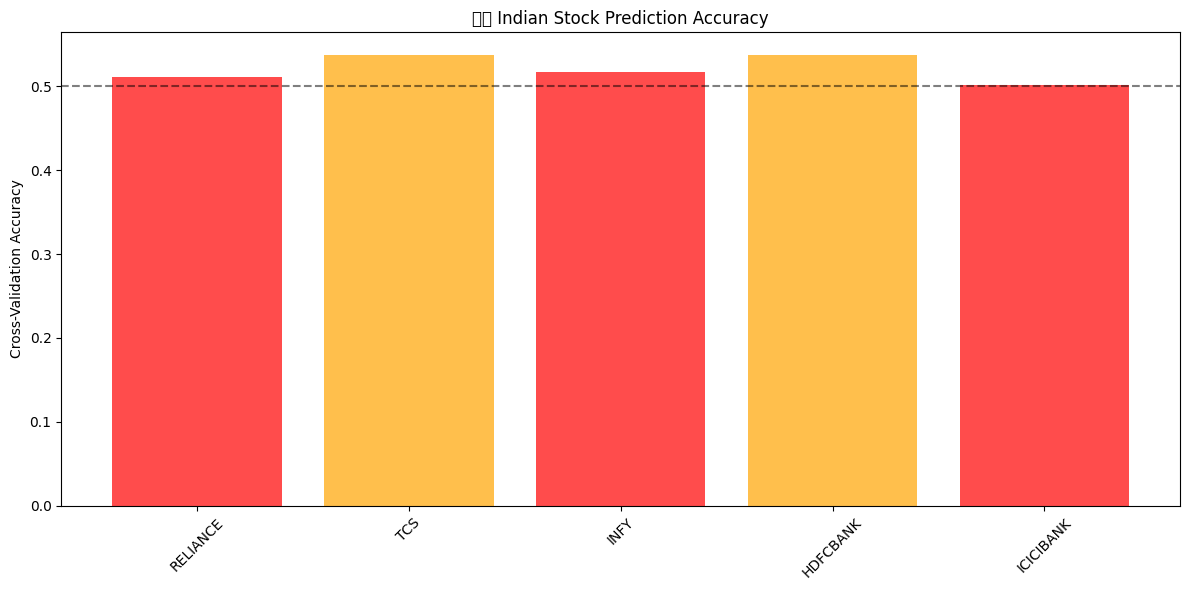

performance summary:
RELIANCE    : 0.5117 Poor
TCS         : 0.5377 Fair
INFY        : 0.5169 Poor
HDFCBANK    : 0.5377 Fair
ICICIBANK   : 0.5013 Poor


In [6]:
companies = list(results.keys())
scores = list(results.values())

plt.figure(figsize=(12, 6))
colors = ['green' if s > 0.55 else 'orange' if s > 0.52 else 'red' for s in scores]
plt.bar(companies, scores, color=colors, alpha=0.7)
plt.axhline(y=0.5, color='black', linestyle='--', alpha=0.5)
plt.title('🇮🇳 Indian Stock Prediction Accuracy')
plt.ylabel('Cross-Validation Accuracy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print_performance_summary(results)

In [7]:
predictor = StockPredictor(trainer.models)
predictions = predictor.predict_portfolio(STOCKS)

for company, result in predictions.items():
    if result['prediction'] is not None:
        direction, conf = predictor.format_prediction(result['prediction'], result['confidence'])
        print(f"{company}: {direction} {conf}")

save_models(trainer.models)
print("\n✅ Complete!")

/Users/ML Projects/Stock_Price_Predictor/data_fetcher.py:28: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df=df.fillna(method='ffill').dropna()
/Users/ML Projects/Stock_Price_Predictor/data_fetcher.py:28: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df=df.fillna(method='ffill').dropna()
/Users/ML Projects/Stock_Price_Predictor/data_fetcher.py:28: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df=df.fillna(method='ffill').dropna()
/Users/ML Projects/Stock_Price_Predictor/data_fetcher.py:28: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df=df.fillna(method='ffill').dropna()


RELIANCE: UP Okayish 72.2%
TCS: UP Bad 59.5%
INFY: DOWN Bad 60.2%
HDFCBANK: UP Okayish 65.6%
ICICIBANK: DOWN Okayish 70.9%
File saved 5 models to models/indian_models.joblib

✅ Complete!


/Users/ML Projects/Stock_Price_Predictor/data_fetcher.py:28: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df=df.fillna(method='ffill').dropna()
